In [1]:
import numpy as np
import glob
import re
#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#spacy
import spacy
# python -m spacy download en_core_web_sm
#nltk stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#pandas
import pandas as pd

#vis
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

[nltk_data] Downloading package stopwords to /home/sifr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/home/sifr/uni/nlp/nlp_project/venv/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload


In [2]:
df = pd.read_csv("data/ExtractedTweets.csv")
df.head()

,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...


### Extract tweet information

In [3]:
def find_retweeted(tweet):
    '''This function will extract the twitter handles of retweed people'''
    return re.findall('(?<=RT\\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

def find_mentioned(tweet):
    '''This function will extract the twitter handles of people mentioned in the tweet'''
    return re.findall('(?<!RT\\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

# make new columns for retweeted usernames, mentioned usernames and hashtags
df['retweeted'] = df['Tweet'].apply(find_retweeted)
df['mentioned'] = df['Tweet'].apply(find_mentioned)
df['hashtags'] = df['Tweet'].apply(find_hashtags)
df.head(30)

,Party,Handle,Tweet,retweeted,mentioned,hashtags
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P...",[],[],"[#SaveTheInternet, #NetNeutrality]"
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...,[@WinterHavenSun],[@RepDarrenSoto],[]
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...,[@NBCLatino],[@RepDarrenSoto],[]
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...,[@NALCABPolicy],"[@RepDarrenSoto, @LatinoLeader]",[#NALCABPolicy2018]
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...,[@Vegalteno],"[@Pwr4PuertoRico, @RepDarrenSoto, @EspaillatNY]",[]
5,Democrat,RepDarrenSoto,RT @EmgageActionFL: Thank you to all who came ...,[@EmgageActionFL],[],[]
6,Democrat,RepDarrenSoto,Hurricane Maria left approx $90 billion in dam...,[],[],[]
7,Democrat,RepDarrenSoto,RT @Tharryry: I am delighted that @RepDarrenSo...,[@Tharryry],[@RepDarrenSoto],[#NetNeutrality]
8,Democrat,RepDarrenSoto,RT @HispanicCaucus: Trump's anti-immigrant pol...,[@HispanicCaucus],[],[]
9,Democrat,RepDarrenSoto,RT @RepStephMurphy: Great joining @WeAreUnidos...,[@RepStephMurphy],"[@WeAreUnidosUS, @RepDarrenSoto]",[#Orlando]


### Clean metioned, retweets and hashtags from tweet

In [4]:
stop_words = stopwords.words('english')
stop_words.append("rt")

def clean_retweeted(tweet):
    '''This function will extract the twitter handles of retweed people'''
    return re.sub('(?<=RT\\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)

def clean_mentioned(tweet):
    '''This function will extract the twitter handles of people mentioned in the tweet'''
    return re.sub('(?<!RT\\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)

def clean_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.sub('(#[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)

def clean(tweet):
    # Remove mentions, retweets and hashtags
    tweet = clean_hashtags(tweet)
    tweet = clean_mentioned(tweet)
    tweet = clean_retweeted(tweet)
    tweet = tweet.lower()
    # Remove punctuation
    tweet = re.sub("[\\.,;:!/\\?]*", "", tweet)
    # Remove stop words
    tweet = ' '.join([word for word in tweet.split(' ') if not word in stop_words])
    # Remove multiple spaces
    tweet = re.sub("\\s+", " ", tweet)
    return tweet

df['TweetCleaned'] = df['Tweet'].apply(clean)
df.head()

,Party,Handle,Tweet,retweeted,mentioned,hashtags,TweetCleaned
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P...",[],[],"[#SaveTheInternet, #NetNeutrality]",today senate dems vote proud support similar l...
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...,[@WinterHavenSun],[@RepDarrenSoto],[],winter resident alta vista teacher one severa...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...,[@NBCLatino],[@RepDarrenSoto],[],noted hurricane maria left approximately $90 ...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...,[@NALCABPolicy],"[@RepDarrenSoto, @LatinoLeader]",[#NALCABPolicy2018],meeting thanks taking time meet ed marucci gu...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...,[@Vegalteno],"[@Pwr4PuertoRico, @RepDarrenSoto, @EspaillatNY]",[],hurricane season starts june 1st puerto rico’...


### Lemmatize the text

In [5]:
import warnings
# Ignore DeprecationWarning from SelectableGroups
warnings.filterwarnings("ignore", category=DeprecationWarning)
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

def lemmatization(tweet, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    doc = nlp(tweet)
    new_text = []
    for token in doc:
        if token.pos_ in allowed_postags:
            new_text.append(token.lemma_)
    final = " ".join(new_text)
    return final

df['TweetCleaned'] = df['TweetCleaned'].apply(lemmatization)
df.head()

,Party,Handle,Tweet,retweeted,mentioned,hashtags,TweetCleaned
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P...",[],[],"[#SaveTheInternet, #NetNeutrality]",today dem vote proud support similar legislati...
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...,[@WinterHavenSun],[@RepDarrenSoto],[],winter resident teacher several recognize nati...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...,[@NBCLatino],[@RepDarrenSoto],[],note hurricane maria leave approximately damag...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...,[@NALCABPolicy],"[@RepDarrenSoto, @LatinoLeader]",[#NALCABPolicy2018],meeting thank take time
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...,[@Vegalteno],"[@Pwr4PuertoRico, @RepDarrenSoto, @EspaillatNY]",[],hurricane season start readinesswell ♂ 😡


In [6]:
gensim.utils.simple_preprocess("today vote proud support similar legislation", deacc=True)
df.head()

,Party,Handle,Tweet,retweeted,mentioned,hashtags,TweetCleaned
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P...",[],[],"[#SaveTheInternet, #NetNeutrality]",today dem vote proud support similar legislati...
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...,[@WinterHavenSun],[@RepDarrenSoto],[],winter resident teacher several recognize nati...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...,[@NBCLatino],[@RepDarrenSoto],[],note hurricane maria leave approximately damag...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...,[@NALCABPolicy],"[@RepDarrenSoto, @LatinoLeader]",[#NALCABPolicy2018],meeting thank take time
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...,[@Vegalteno],"[@Pwr4PuertoRico, @RepDarrenSoto, @EspaillatNY]",[],hurricane season start readinesswell ♂ 😡


In [7]:
def gen_words(tweet):
    # Use gensims simple simple_preprocess to remove accents, lowercase and tokenize
    return gensim.utils.simple_preprocess(tweet, deacc=True)

df['TweetWords'] = df['TweetCleaned'].apply(gen_words)
df.head()

,Party,Handle,Tweet,retweeted,mentioned,hashtags,TweetCleaned,TweetWords
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P...",[],[],"[#SaveTheInternet, #NetNeutrality]",today dem vote proud support similar legislati...,"[today, dem, vote, proud, support, similar, le..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...,[@WinterHavenSun],[@RepDarrenSoto],[],winter resident teacher several recognize nati...,"[winter, resident, teacher, several, recognize..."
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...,[@NBCLatino],[@RepDarrenSoto],[],note hurricane maria leave approximately damag...,"[note, hurricane, maria, leave, approximately,..."
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...,[@NALCABPolicy],"[@RepDarrenSoto, @LatinoLeader]",[#NALCABPolicy2018],meeting thank take time,"[meeting, thank, take, time]"
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...,[@Vegalteno],"[@Pwr4PuertoRico, @RepDarrenSoto, @EspaillatNY]",[],hurricane season start readinesswell ♂ 😡,"[hurricane, season, start, readinesswell]"


In [8]:
#BIGRAMS AND TRIGRAMS
bigram_phrases = gensim.models.Phrases(df['TweetWords'], min_count=5, threshold=100)
trigram_phrases = gensim.models.Phrases(bigram_phrases[df['TweetWords']], threshold=100)

bigram = gensim.models.phrases.Phraser(bigram_phrases)
trigram = gensim.models.phrases.Phraser(trigram_phrases)

def make_bigrams(tweetWords):
    return bigram[tweetWords]

def make_trigrams(bigrams):
    return trigram[bigram[bigrams]]

df['bigramms'] =  df['TweetWords'].apply(make_bigrams)
df['trigrams'] = df['bigramms'].apply(make_trigrams)
df.head(30)

,Party,Handle,Tweet,retweeted,mentioned,hashtags,TweetCleaned,TweetWords,bigramms,trigrams
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P...",[],[],"[#SaveTheInternet, #NetNeutrality]",today dem vote proud support similar legislati...,"[today, dem, vote, proud, support, similar, le...","[today, dem, vote, proud, support, similar, le...","[today, dem, vote, proud, support, similar, le..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...,[@WinterHavenSun],[@RepDarrenSoto],[],winter resident teacher several recognize nati...,"[winter, resident, teacher, several, recognize...","[winter, resident, teacher, several, recognize...","[winter, resident, teacher, several, recognize..."
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...,[@NBCLatino],[@RepDarrenSoto],[],note hurricane maria leave approximately damag...,"[note, hurricane, maria, leave, approximately,...","[note, hurricane, maria, leave, approximately,...","[note, hurricane, maria, leave, approximately,..."
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...,[@NALCABPolicy],"[@RepDarrenSoto, @LatinoLeader]",[#NALCABPolicy2018],meeting thank take time,"[meeting, thank, take, time]","[meeting, thank, take, time]","[meeting, thank, take, time]"
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...,[@Vegalteno],"[@Pwr4PuertoRico, @RepDarrenSoto, @EspaillatNY]",[],hurricane season start readinesswell ♂ 😡,"[hurricane, season, start, readinesswell]","[hurricane_season, start, readinesswell]","[hurricane_season, start, readinesswell]"
5,Democrat,RepDarrenSoto,RT @EmgageActionFL: Thank you to all who came ...,[@EmgageActionFL],[],[],thank come orlando gala successful night possible,"[thank, come, orlando, gala, successful, night...","[thank, come, orlando, gala, successful, night...","[thank, come, orlando, gala, successful, night..."
6,Democrat,RepDarrenSoto,Hurricane Maria left approx $90 billion in dam...,[],[],[],leave damage yet allocate rebuild grid,"[leave, damage, yet, allocate, rebuild, grid]","[leave, damage, yet, allocate, rebuild, grid]","[leave, damage, yet, allocate, rebuild, grid]"
7,Democrat,RepDarrenSoto,RT @Tharryry: I am delighted that @RepDarrenSo...,[@Tharryry],[@RepDarrenSoto],[#NetNeutrality],delight voting rule find,"[delight, voting, rule, find]","[delight, voting, rule, find]","[delight, voting, rule, find]"
8,Democrat,RepDarrenSoto,RT @HispanicCaucus: Trump's anti-immigrant pol...,[@HispanicCaucus],[],[],trump anti - immigrant policy hurt small busin...,"[trump, anti, immigrant, policy, hurt, small, ...","[trump, anti, immigrant, policy, hurt, small_b...","[trump, anti_immigrant, policy, hurt, small_bu..."
9,Democrat,RepDarrenSoto,RT @RepStephMurphy: Great joining @WeAreUnidos...,[@RepStephMurphy],"[@WeAreUnidosUS, @RepDarrenSoto]",[#Orlando],great join roundtable federal issue affect cen...,"[great, join, roundtable, federal, issue, affe...","[great, join, roundtable, federal, issue, affe...","[great, join, roundtable, federal, issue, affe..."


In [9]:
#TF-IDF REMOVAL
from gensim.models import TfidfModel

id2word = corpora.Dictionary(df['trigrams'])

texts = df['trigrams']

corpus = [id2word.doc2bow(text) for text in texts]
# print (corpus[0][0:20])

tfidf = TfidfModel(corpus, id2word=id2word)

low_value = 0.03
words  = []
words_missing_in_tfidf = []
for i in range(0, len(corpus)):
    bow = corpus[i]
    low_value_words = [] #reinitialize to be safe. You can skip this.
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value < low_value]
    drops = low_value_words+words_missing_in_tfidf
    for item in drops:
        words.append(id2word[item])
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids] # The words with tf-idf socre 0 will be missing

    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]
    corpus[i] = new_bow

corpus[:5]

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1)],
 [(10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1)],
 [(16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)],
 [(23, 1), (24, 1), (25, 1), (26, 1)],
 [(27, 1), (28, 1), (29, 1)]]

In [10]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus[:-1],
                                            id2word=id2word,
                                            num_topics=10,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha="auto")


In [11]:
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

/home/sifr/uni/nlp/nlp_project/venv/lib/python3.10/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/home/sifr/uni/nlp/nlp_project/venv/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
/home/sifr/uni/nlp/nlp_project/venv/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
/home/sifr/uni/nlp/nlp_project/venv/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of impo

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.395360  0.222366       1        1  18.525114
2      0.116544  0.418409       2        1  16.526318
7     -0.339028 -0.281069       3        1  12.280391
5     -0.258253  0.368819       4        1  11.253510
8      0.165821 -0.414980       5        1  10.447516
0     -0.131113  0.146124       6        1   7.563208
4     -0.071627 -0.306355       7        1   7.094571
1     -0.395211  0.011896       8        1   6.447447
6      0.147757 -0.033413       9        1   5.015288
3      0.369750 -0.131797      10        1   4.846636, topic_info=               Term          Freq         Total Category  logprob  loglift
8             today  11089.000000  11089.000000  Default  30.0000  30.0000
198        httpstco   7748.000000   7748.000000  Default  29.0000  29.0000
26             time   3752.000000   3752.000000  Default  28.0000  28.0000
65             year   4864.000000   4864.000000  Default  27.0000  27.0000
671             tax   4637.000000   4637.000000  Default  26.0000  26.0000
...             ...           ...           ...      ...      ...      ...
1279  investigation    291.810903    292.761133  Topic10  -4.7098   3.0236
1009          reach    279.814522    280.764726  Topic10  -4.7518   3.0235
276      conference    275.574214    276.524332  Topic10  -4.7671   3.0234
2913        package    271.571146    272.521492  Topic10  -4.7817   3.0234
2732         caucus    242.143055    243.093352  Topic10  -4.8964   3.0230

[330 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
115       9  0.998519     access
644       2  0.999432        act
1645      8  0.997741     action
1670      8  0.996548        add
215      10  0.998292    address
...     ...       ...        ...
121       9  0.998553     worker
1767      6  0.998337  workforce
821       8  0.998307      world
65        3  0.999837       year
310       1  0.999295  yesterday

[300 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 3, 8, 6, 9, 1, 5, 2, 7, 4])

In [18]:
def get_document_topic(model, trigram):
    doc_bow = id2word.doc2bow(trigram)
    vec = model.get_document_topics(doc_bow)
    return [v for _, v in vec]

df['topic_vec'] = df['trigrams'].apply(lambda trigram: get_document_topic(lda_model, trigram))
df.head()

,Party,Handle,Tweet,retweeted,mentioned,hashtags,TweetCleaned,TweetWords,bigramms,trigrams,topic_vec
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P...",[],[],"[#SaveTheInternet, #NetNeutrality]",today dem vote proud support similar legislati...,"[today, dem, vote, proud, support, similar, le...","[today, dem, vote, proud, support, similar, le...","[today, dem, vote, proud, support, similar, le...","[0.08222833, 0.052401405, 0.25985748, 0.039339..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...,[@WinterHavenSun],[@RepDarrenSoto],[],winter resident teacher several recognize nati...,"[winter, resident, teacher, several, recognize...","[winter, resident, teacher, several, recognize...","[winter, resident, teacher, several, recognize...","[0.063910834, 0.05469578, 0.13978879, 0.041061..."
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...,[@NBCLatino],[@RepDarrenSoto],[],note hurricane maria leave approximately damag...,"[note, hurricane, maria, leave, approximately,...","[note, hurricane, maria, leave, approximately,...","[note, hurricane, maria, leave, approximately,...","[0.06535524, 0.05593288, 0.23245636, 0.0419908..."
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...,[@NALCABPolicy],"[@RepDarrenSoto, @LatinoLeader]",[#NALCABPolicy2018],meeting thank take time,"[meeting, thank, take, time]","[meeting, thank, take, time]","[meeting, thank, take, time]","[0.06840658, 0.12892774, 0.14962211, 0.0439496..."
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...,[@Vegalteno],"[@Pwr4PuertoRico, @RepDarrenSoto, @EspaillatNY]",[],hurricane season start readinesswell ♂ 😡,"[hurricane, season, start, readinesswell]","[hurricane_season, start, readinesswell]","[hurricane_season, start, readinesswell]","[0.09648942, 0.06144706, 0.16040578, 0.0461241..."


Confusion Matrix

Scores: Read as (Precision, Recall, F-Score)
(0.5365337738148694, 0.5177539067612491, 0.45105276953746376, None)
Accuracy: 0.5265633433572365


/home/sifr/uni/nlp/nlp_project/venv/lib64/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


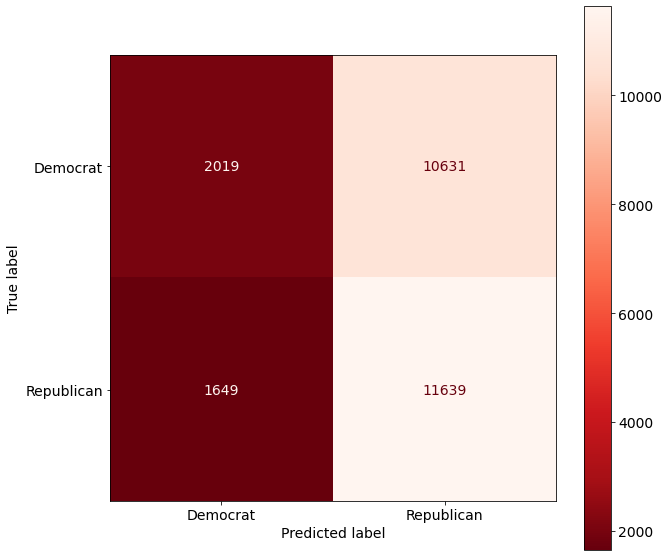

[[ 2019 10631]
 [ 1649 11639]]


In [22]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

def evaluate_model(model):
    df['topic_vec'] = df['trigrams'].apply(lambda trigram: get_document_topic(model, trigram))

    text_train, text_test, label_train, label_test = train_test_split(df["topic_vec"], df['Party'], train_size=0.70, random_state=101, test_size=0.30, shuffle=True)
    cl = MLPClassifier()
    # Train and predict
    cl.fit(text_train.to_list(), label_train)
    prediction = cl.predict(text_test.to_list())

    # Confusion matrix
    confusion = confusion_matrix(label_test, prediction)
    # increase size of plot and fontsize for improved visibility
    #fig, ax_cm = plt.subplots(figsize=(10, 10))
    #plt.rcParams.update({'font.size': 14})
    # create plot for multi-class confusion matrix, use prepared axes object and change colormap for better contrast
    #plot_confusion_matrix(cl, text_test.to_list(), label_test.to_list(), ax=ax_cm, cmap=plt.cm.Reds_r)
    # show plot corresponding to printed name and accuracy
    #plt.show()
    accuracy = accuracy_score(label_test, prediction)
    precision, recall, fscore = precision_recall_fscore_support(label_test, prediction, average='macro')
    return confusion, accuracy, precision, recall, fscore


Evaluating the model see: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#5preparestopwords

In [12]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    evaluations = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaModel(corpus=corpus[:-1],
                                            id2word=id2word,
                                            num_topics=num_topics,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha="auto")
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        evaluations.append(evaluate_model(model))

    return model_list, coherence_values, evaluations

In [13]:
model_list, coherence_values, evaluations = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=2, limit=40, step=6)

Process AccumulatingWorker-9:
Process AccumulatingWorker-15:
Process AccumulatingWorker-10:
Process AccumulatingWorker-13:
Process AccumulatingWorker-12:
Process AccumulatingWorker-14:
Process AccumulatingWorker-11:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib64/python3.10/multiprocessing/process.py", line 318, in _bootstrap
    util._exit_function()
  File "/usr/lib64/python3.10/multiprocessing/process.py", line 318, in _bootstrap
    util._exit_function()
  File "/usr/lib64/python3.10/multiprocessing/process.py", line 318, in _bootstrap
    util._exit_function()
  File "/usr/lib64/python3.10/multiprocessing/process.py", line 318, in _bootstrap
    util._exit_function()
  File "/usr/lib64/python3.10/multiprocessing/util.py", line 360, in _exit_function
    _run_finalizers

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
limit=40
start=2
step=6
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend("coherence_values", loc='best')
plt.show()